In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnnutils import *

plt.rcParams['figure.figsize']=(5.0,4.0)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'
np.random.seed(1)

In [2]:
train_x_orig,train_y,test_x_orig,test_y,classes=load_data() 

In [3]:
m_train=train_x_orig.shape[0]
num_px=train_x_orig.shape[1]
m_test=test_x_orig.shape[0]

print('No of training eg:',m_train)
print('No of testing eg:',m_test)
print('each image size is:('+str(num_px)+','+str(num_px)+',3)',)
print('Training_x_orig shape:'+str(train_x_orig.shape))
print('train_y shape:'+str(train_y.shape))
print('Test_x_orig shape:'+str(test_x_orig.shape))
print('Test_y shape:'+str(test_y.shape))

No of training eg: 209
No of testing eg: 50
each image size is:(64,64,3)
Training_x_orig shape:(209, 64, 64, 3)
train_y shape:(1, 209)
Test_x_orig shape:(50, 64, 64, 3)
Test_y shape:(1, 50)


In [4]:
train_x_faltten=train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten=test_x_orig.reshape(test_x_orig.shape[0],-1).T

train_x=train_x_faltten/255
test_x=test_x_flatten/255

print('train_x reshape:'+str(train_x.shape))
print('test_x reshape:'+str(test_x.shape))

train_x reshape:(12288, 209)
test_x reshape:(12288, 50)


#### L layer deep learning neural network

In [22]:
def initialize_parameter_deep(layer_dims):
    np.random.seed(3)
    parameters={}
    L=len(layer_dims)
    
    for l in range(1,L):
        
        parameters['W'+str(l)]=np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b'+str(l)]=np.zeros([layer_dims[l],1])
    return parameters

In [23]:
layer_dims=[12288,7,5,1] #4 layer NN model

In [24]:
def L_layer_model(X,Y,layer_dims,learning_rate=0.01,num_iterations=3000,print_cost=False):
    
    np.random.seed(1)
    costs=[]
    parameters=initialize_parameter_deep(layer_dims)
    
    
    for i in range(0,num_iterations):
        AL,caches=L_model_forward(X,parameters)
        
        cost=compute_cost(AL,Y)
        
        grads=L_model_backward(AL,Y,caches)
        
        parameters=update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i%100==0 or i==num_iterations-1:
            print('cost after iterations {}:{}'.format(i,np.squeeze(cost)))
            
        if i%100==0 or i==0 or i== num_iterations:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title('Learning rate='+str(learning_rate))
    plt.show()
    
    return parameters,costs

cost after iterations 0:0.6931358380812241
cost after iterations 100:0.6740838926904343
cost after iterations 200:0.6625088917284436
cost after iterations 300:0.6554428601058084
cost after iterations 400:0.6511047602491876
cost after iterations 500:0.6484264231106711
cost after iterations 600:0.6467643557593523
cost after iterations 700:0.6457283494128583
cost after iterations 800:0.6450801200719805
cost after iterations 900:0.6446732042930557
cost after iterations 1000:0.6444170556673747
cost after iterations 1100:0.644255418390851
cost after iterations 1200:0.6441531663667618
cost after iterations 1300:0.6440883233490866
cost after iterations 1400:0.6440470840637966
cost after iterations 1500:0.644020811429926
cost after iterations 1600:0.6440039679128701
cost after iterations 1700:0.6439931396618144
cost after iterations 1800:0.6439861132324921
cost after iterations 1900:0.6439814994327799
cost after iterations 2000:0.6439784072973882
cost after iterations 2100:0.6439762733630467
co

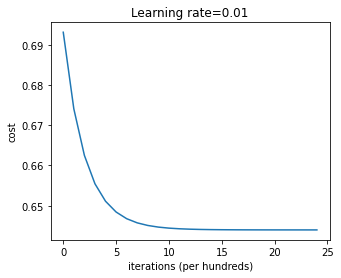

In [25]:
parameters,costs=L_layer_model(train_x,train_y,layer_dims,num_iterations=2500,print_cost=True)

In [27]:
pred_train=predict(train_x,train_y,parameters)

Accuracy: 0.6555023923444976


In [28]:
pred_test=predict(test_x,test_y,parameters)

Accuracy: 0.3400000000000001
